## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='inner')

# Display the data table for preview
Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
No_of_mice = len(Combined_data["Mouse ID"].unique())
No_of_mice

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_Data = Combined_data[Combined_data.duplicated(['Mouse ID','Timepoint'])]
Duplicate_Data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_Data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_data = pd.DataFrame(Combined_data)
Clean_data_df = Clean_data.drop_duplicates('Mouse ID')
Clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [11]:
# Checking the number of mice in the clean DataFrame.
No_of_clean_mice = len(Clean_data_df["Mouse ID"].unique())
No_of_clean_mice

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen_Stats_Sort = Combined_data.sort_values(['Tumor Volume (mm3)'], ascending=True)
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Regimen_Stats_Sort.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen_Stats = Regimen_Stats_Sort.groupby(["Drug Regimen"])
Regimen_Stats
# This method produces everything in a single groupby function
Tumor_Vol = Regimen_Stats["Tumor Volume (mm3)"].sum()
Regimen_Mean = Regimen_Stats["Tumor Volume (mm3)"].mean()
Regimen_Median = Regimen_Stats["Tumor Volume (mm3)"].median()
Regimen_Var = Regimen_Stats["Tumor Volume (mm3)"].var()
Regimen_Std = Regimen_Stats["Tumor Volume (mm3)"].std()
Regimen_SEM = Regimen_Stats["Tumor Volume (mm3)"].sem()

## Bar and Pie Charts

In [14]:
Summary_Stats = pd.DataFrame({"Tot Tumor Vol":Tumor_Vol, "Mean":Regimen_Mean, "Median":Regimen_Median, "Variance":Regimen_Var, "Std Dev":Regimen_Std, "SEM":Regimen_SEM})
Summary_Stats

,Tot Tumor Vol,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,,
Capomulin,9355.420462,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,9361.228582,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,9413.493529,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,10384.299876,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,10105.671026,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,9780.078122,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,8423.930878,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,9169.417875,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,9816.199991,54.233149,52.431737,59.450562,7.710419,0.573111


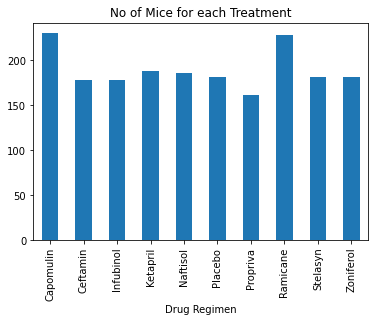

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
No_of_mice_by_Drugs = Combined_data.groupby(["Drug Regimen"]).count()['Mouse ID']
No_of_mice_by_Drugs
Treatment_Chart = No_of_mice_by_Drugs.plot.bar(x="Drug Regimen",y="No of mice", title="No of Mice for each Treatment")


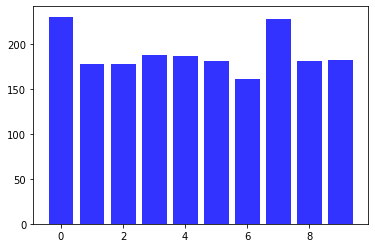

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis =np.arange(len(No_of_mice_by_Drugs))
plt.bar(x_axis,No_of_mice_by_Drugs, color='b', alpha=0.8, align='center')
tick_locations = ["Drug Regimen"]


In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender = Combined_data.groupby(["Mouse ID", "Sex"])
Gender_grp = pd.DataFrame(Gender.size())
Gender_Stats = pd.DataFrame(Gender_grp.groupby(["Sex"]).count())
Gender_Stats.columns = ["Total Count"]
Gender_Stats["Percent"] = (100*(Gender_Stats["Total Count"]/Gender_Stats["Total Count"].sum())) 
Gender_Stats

,Total Count,Percent
Sex,,
Female,124,49.799197
Male,125,50.200803


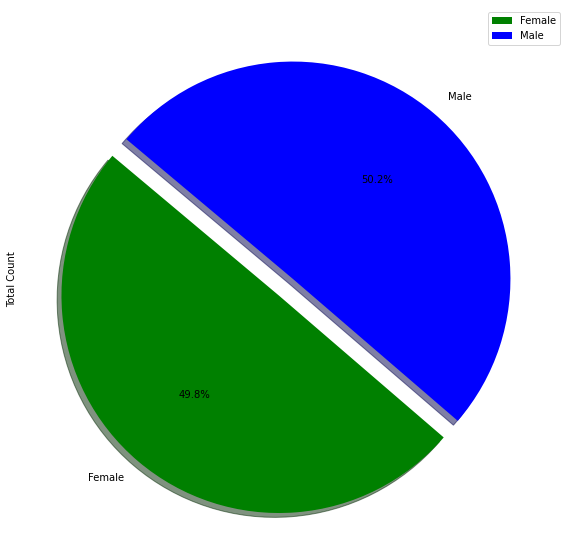

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['g','b']
explode = (0.1, 0)
Gender_pie_plot = Gender_Stats.plot.pie(y='Total Count', figsize=(15,10), colors=colors,startangle=140,explode=explode, shadow=True, autopct="%1.1f%%")
plt.show()
                                        


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Cap_df = Combined_data.loc[Combined_data["Drug Regimen"] =="Capomulin",:]
Ram_df = Combined_data.loc[Combined_data["Drug Regimen"] =="Ramicane",:]
Inf_df = Combined_data.loc[Combined_data["Drug Regimen"] =="Infubinol",:]
Cef_df = Combined_data.loc[Combined_data["Drug Regimen"] =="Ceftamin",:]
Cap_df.head()
# Start by getting the last (greatest) timepoint for each mouse
Cap_last = Cap_df.groupby('Mouse ID').max()['Timepoint']
Cap_last_vol = pd.DataFrame(Cap_last)
Cap_lastmerge = pd.merge(Cap_last_vol, Combined_data, on=("Mouse ID", "Timepoint"), how="left")
Cap_lastmerge.head()
Ram_last = Ram_df.groupby('Mouse ID').max()['Timepoint']
Ram_last_vol = pd.DataFrame(Ram_last)
Ram_lastmerge = pd.merge(Ram_last_vol, Combined_data, on=("Mouse ID", "Timepoint"), how="left")
Ram_lastmerge.head()
Inf_last = Inf_df.groupby('Mouse ID').max()['Timepoint']
Inf_last_vol = pd.DataFrame(Inf_last)
Inf_lastmerge = pd.merge(Inf_last_vol, Combined_data, on=("Mouse ID", "Timepoint"), how="left")
Inf_lastmerge.head()
Cef_last = Cef_df.groupby('Mouse ID').max()['Timepoint']
Cef_last_vol = pd.DataFrame(Cef_last)
Cef_lastmerge = pd.merge(Cef_last_vol, Combined_data, on=("Mouse ID", "Timepoint"), how="left")
Cef_lastmerge.head()
Cap_tumors = Cap_lastmerge["Tumor Volume (mm3)"]
Ram_tumors = Ram_lastmerge["Tumor Volume (mm3)"]
Inf_tumors = Inf_lastmerge["Tumor Volume (mm3)"]
Cef_tumors = Cef_lastmerge["Tumor Volume (mm3)"]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Plot_data = [Cap_tumors, Ram_tumors, Inf_tumors, Cef_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

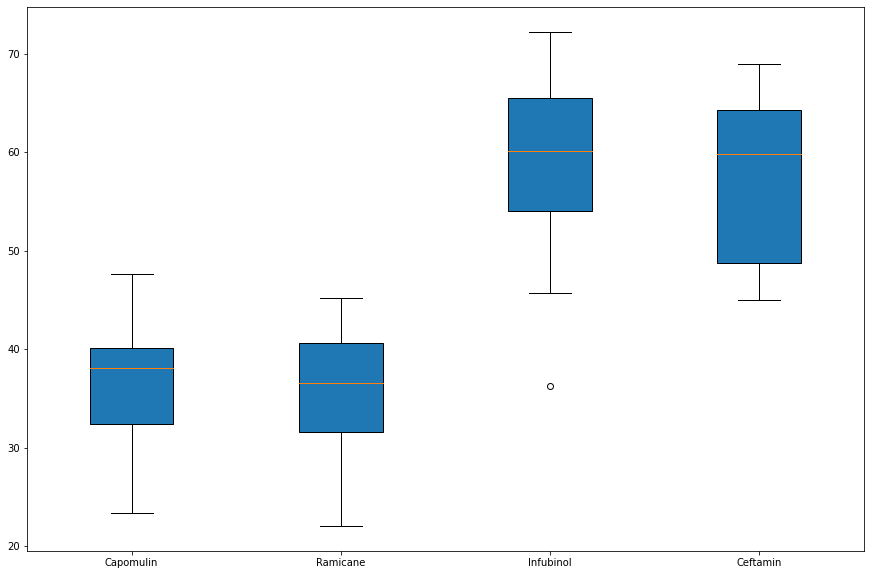

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Plot_data = [Cap_tumors, Ram_tumors, Inf_tumors, Cef_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
figl, axl = plt.subplots(figsize=(15, 10))
axl.boxplot(Plot_data, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
